In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy 
import math


* We have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, We have the applicant’s scores on two exams and the admissions decision. 
* Our task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

# Loading the Dataset

In [3]:
data  = np.loadtxt('datasets/ex2data1.txt', delimiter = ',')

In [4]:
#first two columns have the subjects marks that we are including
x_train = data[:,:2]

#result training data i.e all the rows of second columns have 0 and 1 means 
#admitted or not admitted
y_train = data[:,2]

# Checking Data

In [9]:
print("First five elements in X_train are:\n", x_train[:5])
print("Type of x_train:",type(x_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of x_train: <class 'numpy.ndarray'>


In [10]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [11]:
print ('The shape of x_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of x_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


# Visualizing the Dataset

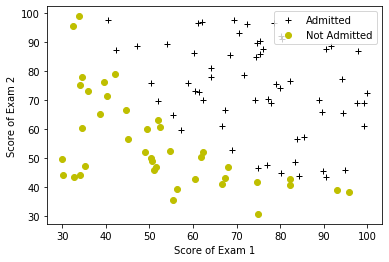

In [17]:
positive = y_train == 1
negative = y_train == 0

            #positive of column 0  and  column 1

#means for y ==1, subjext 1 (column 0) will be x plotted against subject 2 (column 1)
plt.plot(x_train[positive, 0], x_train[positive, 1],'k+', label = 'Admitted')

#so fot y == 0, simply plot all points in x and y plane
plt.plot(x_train[negative, 0], x_train[negative, 1],'yo',  label = 'Not Admitted')


plt.xlabel("Score of Exam 1")
plt.ylabel("Score of Exam 2")
plt.legend(loc = "upper right")

Our goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

###  Sigmoid function
We need sigmoid function so that we can make a classification model for this problem

In [19]:
def sigmoid(z):       
    g = 1 / (1 + np.exp(-z))    
    return g

As we know from graph of logistic regression:
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give you exactly 0.5. 

In [20]:
#checling sigmoid function
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


# Cost function for logistic regression


As logistic regression's cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$





In [21]:
def compute_cost(x, y, w, b, lambda_ = 1):
    m, n = x.shape
    cost = 0
    
    for i in range(m):
        z_wb_i = np.dot(w, x[i]) + b
        f_wb_i = sigmoid(z_wb_i)
        cost += (-y[i] * np.log(f_wb_i)) - (1 - y[i]) * np.log(1 - f_wb_i)
        
    total_cost = cost / m
    return total_cost

In [24]:
#checking cost function
m, n = x_train.shape

w_temp = np.zeros(n)
b_temp = 0.

print("cost value with these values of w and b: ", compute_cost(x_train, y_train, w_temp, b_temp))

cost value with these values of w and b:  0.6931471805599458


# Gradient for logistic regression
Gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

## For dj/dw and dj/db Values:

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

In [60]:
def compute_gradient(x, y, w, b, lambda_ = None):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i,j]
        dj_db += (f_wb_i - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw
    

In [61]:
#checking fucntion
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]



using above values in:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

In [62]:
def gradient_descent(x, y, w, b, cost_function, gradient_values, alpha, num_iters, lambda_):
    m = x.shape
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_values(x, y, w, b, lambda_)
        
        #now implement
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
    return w, b

In [63]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.001

w,b, = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

ValueError: setting an array element with a sequence.